<a href="https://colab.research.google.com/github/commitit/NLP/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

path_to_csv = '/content/gdrive/MyDrive/Data/review.csv'

Mounted at /content/gdrive


In [128]:
 df = pd.read_csv(path_to_csv)
 df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [129]:
df.shape

(50000, 2)

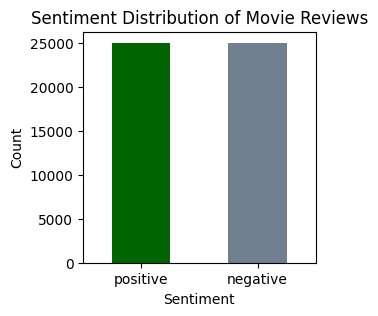

In [130]:
from matplotlib import pyplot as plt
plt.figure(figsize=(3, 3))
sentiment_counts.plot(kind='bar', color=['darkgreen', 'slategrey']) #  green for positive and grey for negative
plt.title('Sentiment Distribution of Movie Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [131]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [132]:
#numeric representation
#df["sentiment_num"] = df.sentiment.map({
#    "positive": 1,
#    "negative": 0
#})

#df.head()

In [133]:
df['sentiment'].replace({'positive':1,'negative':0},inplace=True)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


###Text cleaning:
- Remove html tags
- Remove special Character
- Converting every thing to lower case
- Remove stop words
- stemming

In [134]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [135]:
# removing html tags
def remove_html_tags(text):
    pattern=re.compile('<.*?>')
    return pattern.sub(r'' ,text)

df['review']=df['review'].apply(remove_html_tags)

In [136]:
#Converting data into lowercase since python is case sensitive
df['review']=df['review'].str.lower()

In [137]:
df['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [138]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+ | www\. \S+')
    return pattern.sub(r'', text)

df['review'] = df['review'].apply(remove_url)

df.head()['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [139]:
#removing punctuation

import string
exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

df['review'] = df['review'].apply(remove_punc)

df['review'][0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictur

In [140]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

df['review'] = df['review'].apply(remove_stopwords)

df['review'][0]

'one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle 

In [142]:
#Tokenization
import nltk

# Download the punkt tokenizer data
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def word_tokenizer(text):
    return word_tokenize(text)

df['review'] = df['review'].apply(word_tokenizer)

df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,review,sentiment
0,"[one, reviewers, mentioned, watching, 1, oz, e...",1
1,"[wonderful, little, production, filming, techn...",1
2,"[thought, wonderful, way, spend, time, hot, su...",1
3,"[basically, theres, family, little, boy, jake,...",0
4,"[petter, matteis, love, time, money, visually,...",1


In [ ]:
1.Stemming
2.TF_IDF

In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.review,
    df.sentiment,
    test_size = 0.2, #20% test data
    random_state = 2022,
    stratify=df.sentiment    # to balance
)

In [146]:
print("Shape of X_train: ", X_train.shape)
print("Shape pf X_test: ", X_test.shape)

Shape of X_train:  (40000,)
Shape pf X_test:  (10000,)


In [147]:
y_train.value_counts()

0    20000
1    20000
Name: sentiment, dtype: int64

In [148]:
y_test.value_counts()

1    5000
0    5000
Name: sentiment, dtype: int64

### Process the data

We need our data in a certain format before we pass it to the Bert base uncased, this model requires input_ids, token_type_ids, attention_mask, label, and text.

https://huggingface.co/docs/transformers/model_doc/auto#transformers.AutoTokenizer